# Projet Exercice KNN

En raison de la simplicité du KNN pour la classification, nous nous concentrerons sur l'utilisation d'un outil PipeLine et d'un outil GridSearchCV, puisque ces compétences peuvent être généralisées pour tout modèle.


## Les données du Sonar 

### Détecter un rocher ou une mine

Un sonar (sound navigation ranging) est une technique qui utilise la propagation du son (généralement sous l'eau, comme dans la navigation sous-marine) pour naviguer, communiquer ou détecter des objets sur ou sous la surface de l'eau, comme d'autres navires.


Le dataset contient les mesures de réponse pour 60 fréquences sonar distinctes envoyées contre un champ de mines connu (et des rochers connus). Ces fréquences sont ensuite étiquetées en fonction de l'objet connu sur lequel le son était dirigé (soit un rocher, soit une mine). 


Notre objectif principal est de créer un modèle de Machine Learning capable de détecter la différence entre un rocher et une mine sur la base de la réponse des 60 fréquences sonar distinctes.


Data Source : https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



---
---



### Effectuez les tâches en gras

**Tâche : Exécutez les cellules ci-dessous pour charger les données.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# LECTURE CSV à éxécuter

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
"""url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/sonar.all-data.csv'
df = pd.read_csv(url)"""

# Sinon lecture classique en important sur Google Colab ou depuis le chemin exact
df = pd.read_csv("C:\\Users\\DENIS FBI STORE\\GLO5-IA\\sonar.all-data.csv")


In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [12]:
# Renommer les colonnes pour plus de clarté (optionnel)
columns = [f'Freq_{i+1}' for i in range(60)] + ['Label']
df.columns = columns


In [17]:
#Sélectionner uniquement les colonnes de fréquences (sans la colonne Label)
freq_data = df.iloc[:, :-1]  # Toutes les colonnes sauf la dernière


## Exploration des Données

**Tâche : Créez une heatmap de la corrélation entre les différentes réponses en fréquence.**

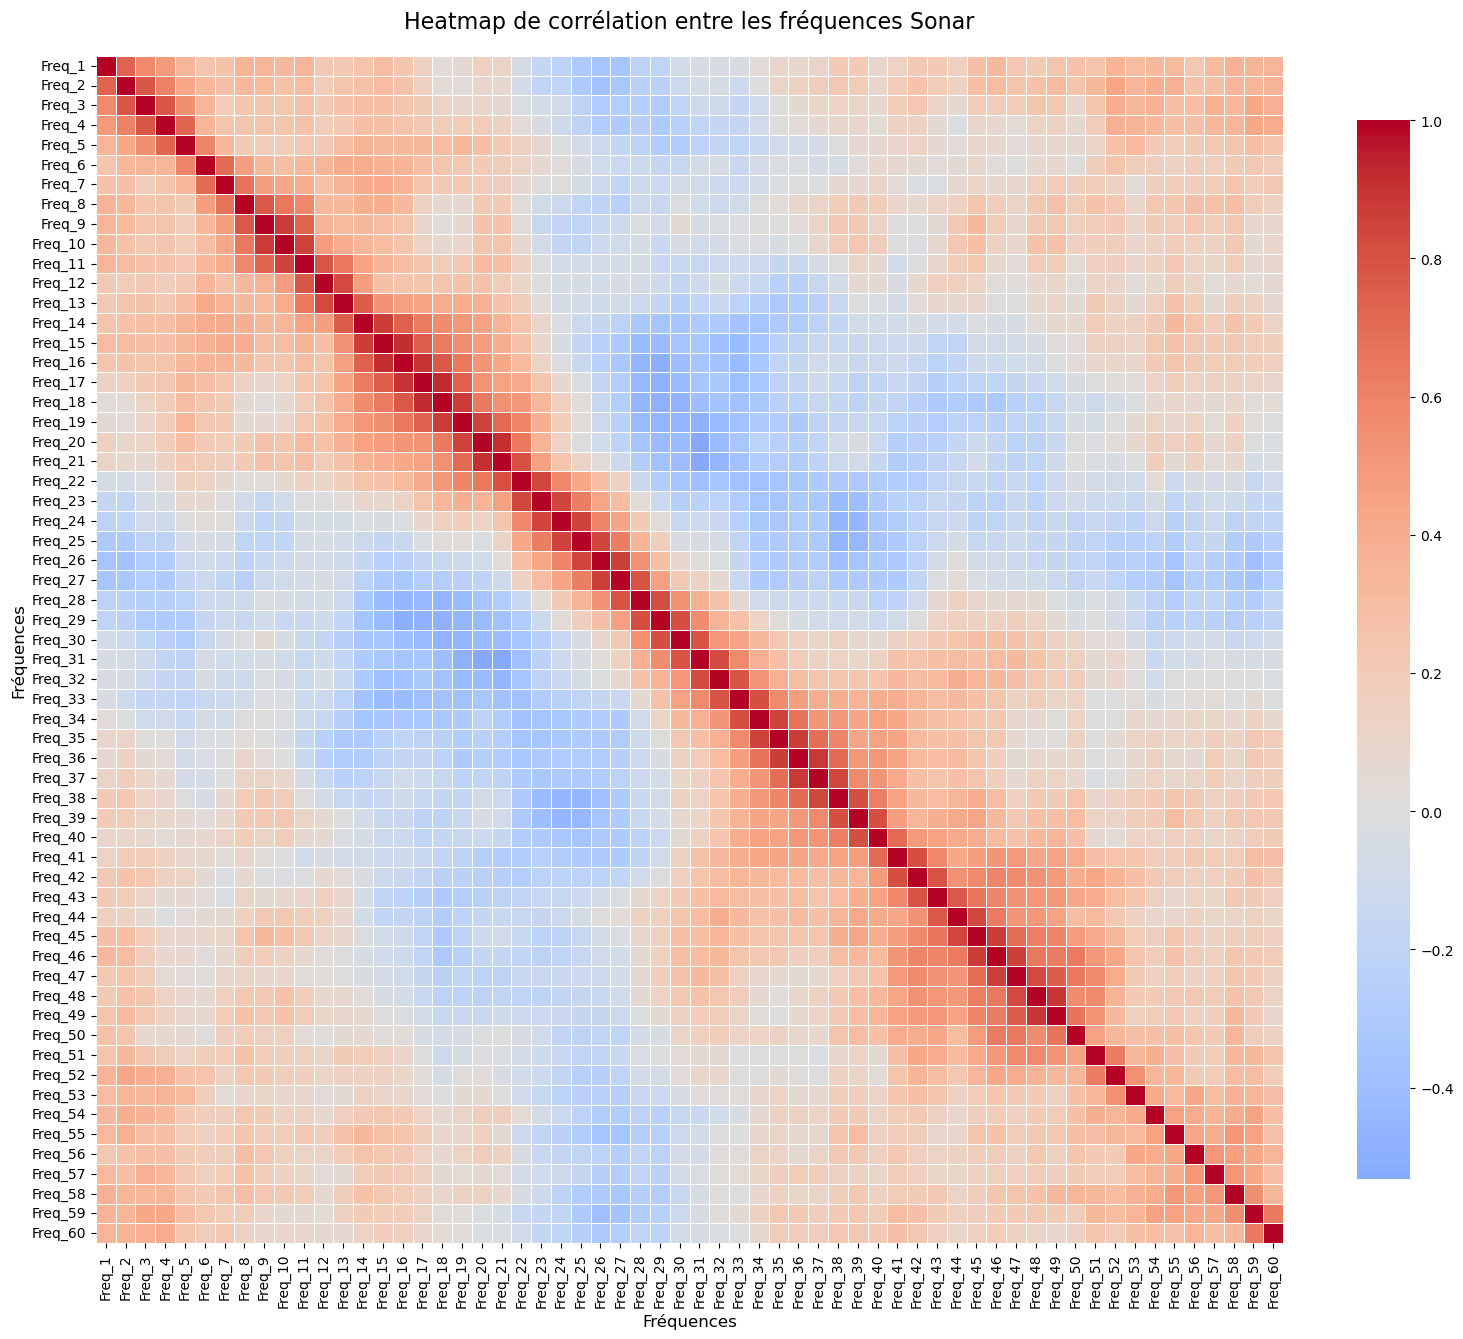

In [15]:
 #Calculer la matrice de corrélation
correlation_matrix = freq_data.corr()

# Créer la heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',  # Palette de couleurs
            center=0,          # Centrer sur 0
            square=True,       # Cases carrées
            linewidths=0.5,    # Lignes entre les cases
            cbar_kws={"shrink": 0.8})  # Taille de la barre de couleur

plt.title('Heatmap de corrélation entre les fréquences Sonar', fontsize=16, pad=20)
plt.xlabel('Fréquences', fontsize=12)
plt.ylabel('Fréquences', fontsize=12)
plt.tight_layout()
plt.show()

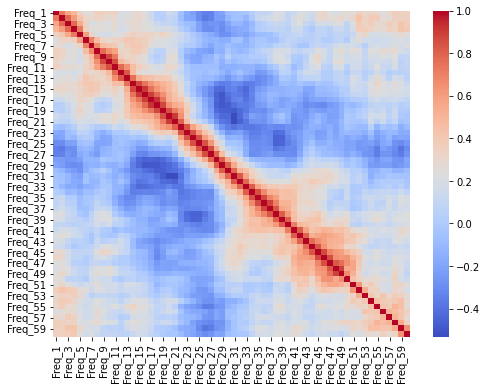

**Tâche : Quelles sont les 5 fréquences les plus corrélées avec la variable cible (label/target) ?**

*Note : Vous devrez souvent faire correspondre le label ou l'étiquette à des 0 et des 1.*

*Note supplémentaire : Nous recherchons des valeurs de corrélation **absolues**.*

In [19]:
# Convertir les labels R (Rock) et M (Mine) en 0 et 1
# R = 0, M = 1
df['Label_encoded'] = df['Label'].map({'R': 0, 'M': 1})

In [21]:
# Vérifier la conversion
print("Distribution des labels encodés :")
print(df['Label_encoded'].value_counts())
print("\nExemple de conversion :")
print(df[['Label', 'Label_encoded']].head())

# Calculer la corrélation de chaque fréquence avec la variable cible
correlations = df.iloc[:, :-2].corrwith(df['Label_encoded'])


Distribution des labels encodés :
Label_encoded
1    111
0     97
Name: count, dtype: int64

Exemple de conversion :
  Label  Label_encoded
0     R              0
1     R              0
2     R              0
3     R              0
4     R              0


In [22]:
# Obtenir les valeurs absolues de corrélation
correlations_abs = correlations.abs()

# Trier par ordre décroissant et afficher les 5 plus corrélées
top_5_corr = correlations_abs.sort_values(ascending=False).head(5)

print("\n" + "="*60)
print("Les 5 fréquences les PLUS corrélées avec le Label (en valeur absolue) :")
print("="*60)
print(top_5_corr)

# Afficher aussi les valeurs de corrélation originales (avec le signe)
print("\n" + "="*60)
print("Corrélations originales (avec signe) pour ces 5 fréquences :")
print("="*60)
for freq in top_5_corr.index:
    print(f"{freq}: {correlations[freq]:.4f}")



Les 5 fréquences les PLUS corrélées avec le Label (en valeur absolue) :
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
dtype: float64

Corrélations originales (avec signe) pour ces 5 fréquences :
Freq_11: 0.4329
Freq_12: 0.3922
Freq_49: 0.3513
Freq_10: 0.3411
Freq_45: 0.3394


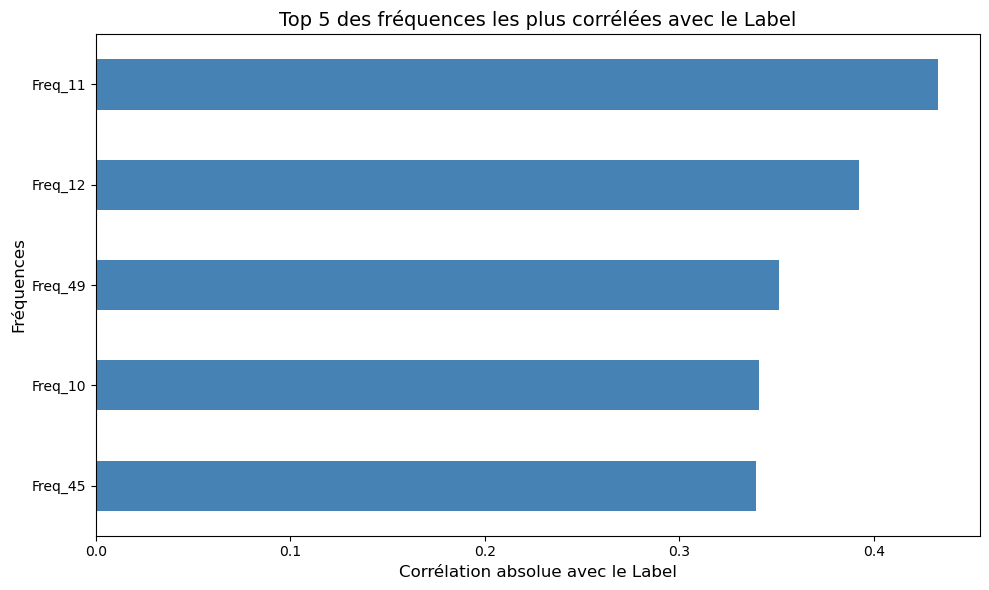

In [23]:
# Visualisation
plt.figure(figsize=(10, 6))
top_5_corr.plot(kind='barh', color='steelblue')
plt.xlabel('Corrélation absolue avec le Label', fontsize=12)
plt.ylabel('Fréquences', fontsize=12)
plt.title('Top 5 des fréquences les plus corrélées avec le Label', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Fractionnement Entraînement / Test

Notre approche ici consistera à utiliser la validation croisée (Cross Validation) sur 90% de l'ensemble de données, puis à juger nos résultats sur un ensemble de test final de 10% pour évaluer notre modèle.

**Tâche : Séparez les données en Features et en Label, puis divisez-les en un ensemble d'entraînement et un ensemble de test, avec 90 % pour l'entraînement (pour la validation croisée) et 10 % pour l'ensemble de test final.**

*Note : La solution utilise un random_state de 42*

In [24]:
# Importer la librairie pour la division
from sklearn.model_selection import train_test_split

# Séparer les Features (X) et le Label (y)
X = df.iloc[:, :-1].values  # Toutes les colonnes sauf la dernière (les 60 fréquences)
y = df['Label'].values       # La colonne Label (R ou M)

# Afficher les dimensions
print("Shape des Features (X) :", X.shape)
print("Shape du Label (y) :", y.shape)
print("\nPremières valeurs de y :", y[:10])


Shape des Features (X) : (208, 61)
Shape du Label (y) : (208,)

Premières valeurs de y : ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R']


In [25]:
# Diviser en ensemble d'entraînement (90%) et ensemble de test (10%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.10,      # 10% pour le test
    random_state=42,     # Pour la reproductibilité
    stratify=y           # Pour garder la même proportion de R et M dans train et test
)


In [26]:

# Afficher les dimensions après la division
print("\n" + "="*60)
print("DIMENSIONS APRÈS DIVISION :")
print("="*60)
print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")



DIMENSIONS APRÈS DIVISION :
X_train : (187, 61)
X_test  : (21, 61)
y_train : (187,)
y_test  : (21,)


In [27]:
# Vérifier la distribution des classes dans train et test
print("\n" + "="*60)
print("DISTRIBUTION DES CLASSES :")
print("="*60)
print(f"y_train - R: {np.sum(y_train == 'R')}, M: {np.sum(y_train == 'M')}")
print(f"y_test  - R: {np.sum(y_test == 'R')}, M: {np.sum(y_test == 'M')}")

# Calculer les pourcentages
print(f"\nPourcentage train : {len(X_train) / len(X) * 100:.1f}%")
print(f"Pourcentage test  : {len(X_test) / len(X) * 100:.1f}%")


DISTRIBUTION DES CLASSES :
y_train - R: 87, M: 100
y_test  - R: 10, M: 11

Pourcentage train : 89.9%
Pourcentage test  : 10.1%


In [ ]:
# code ici

**Tâche : Créer un PipeLine qui contient à la fois un StandardScaler et un modèle KNN.**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [32]:

# Créer le Pipeline
# Le Pipeline exécute les étapes dans l'ordre : d'abord le scaling, puis le modèle KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Étape 1 : Normalisation des données
    ('knn', KNeighborsClassifier())         # Étape 2 : Modèle KNN (k par défaut = 5)
])

# Afficher le pipeline
print("Pipeline créé :")
print(pipeline)
print("\n" + "="*60)
print("Étapes du Pipeline :")
print("="*60)
for step_name, step_obj in pipeline.steps:
    print(f"- {step_name}: {step_obj}")

Pipeline créé :
Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

Étapes du Pipeline :
- scaler: StandardScaler()
- knn: KNeighborsClassifier()


In [ ]:
# code ici

**Tâche : Effectuer une recherche par grille (GridSearch) avec le pipeline pour tester différentes valeurs de k et rapporter les paramètres les plus performants.**

In [34]:
# Extraire les résultats de la validation croisée
results = grid_search.cv_results_

# Créer un DataFrame pour faciliter la manipulation
results_df = pd.DataFrame({
    'K': [params['knn__n_neighbors'] for params in results['params']],
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score']
})

print("\n" + "="*60)
print("SCORES MOYENS PAR VALEUR DE K :")
print("="*60)
print(results_df)

# Créer le graphique
plt.figure(figsize=(12, 6))

# Tracer la courbe avec les barres d'erreur
plt.errorbar(results_df['K'], 
             results_df['mean_test_score'], 
             yerr=results_df['std_test_score'],
             marker='o', 
             linestyle='-', 
             linewidth=2,
             markersize=8,
             capsize=5,
             color='steelblue',
             ecolor='lightblue',
             label='Score moyen ± écart-type')

# Marquer le meilleur K
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Meilleur K = {best_k}')
plt.scatter([best_k], [best_score], color='red', s=200, zorder=5, 
            marker='*', label=f'Meilleur score = {best_score:.4f}')

# Personnalisation du graphique
plt.xlabel('Nombre de voisins (K)', fontsize=12, fontweight='bold')
plt.ylabel('Score moyen (Accuracy)', fontsize=12, fontweight='bold')
plt.title('Performance du modèle KNN en fonction de K\n(Validation croisée 5-fold)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='best', fontsize=10)
plt.xticks(results_df['K'])
plt.ylim([results_df['mean_test_score'].min() - 0.02, 
          results_df['mean_test_score'].max() + 0.02])

plt.tight_layout()
plt.show()

# Afficher les 5 meilleures valeurs de K
print("\n" + "="*60)
print("TOP 5 DES MEILLEURES VALEURS DE K :")
print("="*60)
top_5 = results_df.sort_values('mean_test_score', ascending=False).head(5)
print(top_5.to_string(index=False))

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [33]:
# Importer les librairies nécessaires
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Créer le Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Définir la grille de paramètres à tester
param_grid = {
    'knn__n_neighbors': list(range(1, 30))  # De 1 à 29
}

# Créer le GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Afficher l'objet GridSearchCV (sans l'entraîner)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

{'knn': KNeighborsClassifier(n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False}

**Tâche (difficile) : En utilisant le dictionnaire .cv_results_, voyez si vous pouvez créer un graphique de la moyenne des scores de test (mean_test_score) par valeur K.**

In [ ]:
# code ici

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

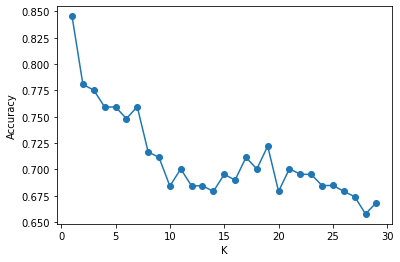

## Évaluation finale du modèle

**Tâche : En utilisant l'objet de grille classificateur (grid classifier) de l'étape précédente, obtenez un rapport final de classification des performances et une matrice de confusion.**

In [ ]:
# code ici

array([[12,  1],
       [ 1,  7]])

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



**Bon courage!**